In [8]:
import requests
from bs4 import BeautifulSoup
import json
import time

def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok

In [9]:
from IPython.display import display, Image, clear_output
import time, random

#I created a 2D array where each key represents the different questions 
#The four keys within the keys are: the question, the answer, number of dots on left circle (nl), number of dots on right circle (nr)
image_list = [[Image("10vs9.jpg", width=500), "l", "10", "9"], [Image("9vs10.jpg", width=500), "r", "9", "19"], 
              [Image("14vs12.jpg", width=500), "l", "14", "12"], [Image("12vs14.jpg", width=500), "r", "12", "14"],
              [Image("16vs12.jpg", width=500), "l", "16", "12"], [Image("12vs16.jpg", width=500), "r", "12", "16"],
              [Image("12vs9.jpg", width=500), "l", "12", "9"], [Image("9vs12.jpg", width=500), "r", "9", "12"],
              [Image("21vs18.jpg", width=500), "l", "21", "18"], [Image("18vs21.jpg", width=500), "r", "18", "21"],
              [Image("20vs15.jpg", width=500), "l", "20", "15"], [Image("15vs20.jpg", width=500), "r", "15", "20"],
              [Image("18vs16.jpg", width=500), "l", "18", "16"], [Image("16vs18.jpg", width=500), "r", "16", "18"],
              [Image("20vs18.jpg", width=500), "l", "20", "18"], [Image("18vs20.jpg", width=500), "r", "18", "20"]]

In [10]:
def run_ANS_test(image_list):
    print("you are on question", i+1, "out of", len(image_list) )
    time.sleep(1.5)
    display(image_list[i][0]) #This displays the question
    time.sleep(0.75)
    clear_output(wait=False)
    display(Image("0vs0.jpg", width=500))

    result=[] #I created a "result" array to add and store information for each question. Each question will store 4 information
    start = time.time()
    ans=""
    ans = input("Which side had more dots (r or l)?: ")
    result.append(ans) #This stores the answer that the user enters
    if ans == image_list[i][1]: #This first if statement is if the user enters the correct answer
        response_time = time.time()-start
        result.append(response_time) #This stores how long the user took on each question. This data will be used to send to the Google form
        if response_time <= 3:
            print("Well done!")
            time.sleep(1)
            print(f"You took {response_time:.2f} seconds")
            result.append(response_time) #This also stores the response time but only if the user took shorter than 3 seconds. This will be used to calculate the total and average time the user took on the test
            result.append(0) #The last key is to count the number of incorrect answers. Entering the correct answer will just append 0
        if response_time > 3:
            print("you spent longer than 3 seconds")
            result.append(0) #If the user takes longer than 3 seconds, it will not be used to calculate the total and average time of the test 
            result.append(1) #Taking longer than 3 seconds will be considered as "incorrect" and will add 1 to the result table
    else: #This is if the user enters an incorrect answer
        print("incorrect")
        time.sleep(1)
        result.append(-1) #If the user enters an incorrect answer, Google form will say that the user took "-1" seconds
        result.append(0) #If the user enters an incorrect answer, it will not be used to calculate the total and average time of the test
        result.append(1) #this is used to count the number of incorrect answers

    time.sleep(1.5)
    clear_output(wait=False)
    return result 

you are on question 12 out of 16


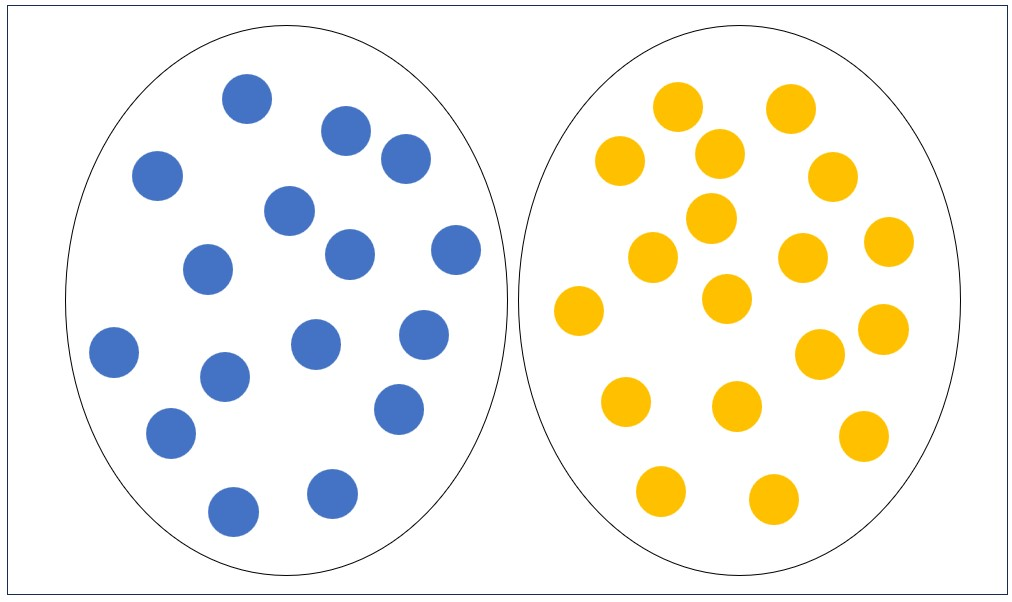

In [ ]:
print("Welcome to the ANS test!")

id_instructions = """

Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:
- two letters based on the initials (first and last name) of a childhood friend
- two letters based on the initials (first and last name) of a favourite actor / actress
e.g. if your friend was called Charlie Brown and film star was Tom Cruise
then your unique identifer would be CBTC
"""

print(id_instructions)
user_id = input("> ")

print("User entered id:", user_id)

print("Please enter your age:")
age = input("> ")

print("Please enter your sex:")
sex = input("> ")

print("Are you left-handed or right-handed?")
handedness = input("> ")

print("Approximately, how many hours of sleep did you get last night?")
sleep = input("> ")

print("This is to measure your reaction time. When the next message is shown press enter as quickly as possible!")
time.sleep(2)
time.sleep(random.randint(1,6))
start_time = time.time() 
input("Press enter now!")
end_time = time.time()
reaction_time =  end_time - start_time
print(f"Well done! your time was {reaction_time:.3f}")
clear_output(wait=True)

random.shuffle(image_list)
print("Welcome to the ANS test")
time.sleep(1.5)
print("You will be shown", len(image_list), "images with 2 circles. Please select the circle with more dots by typing r or l")
time.sleep(4)
print("You have 3 seconds for each image to give your answer. Any answer that takes any longer will not be accepted")
time.sleep(4)
print("You will also have 1.5 seconds of pause between after each question before moving on to the next.")
time.sleep(4.5)
print("Good luck!")
time.sleep(1.5)
clear_output(wait=True)

total_time = 0
incorrect_answers = 0
results = [] #I have created another array called "results" (plural)
    
for i in range (len(image_list)):
    r = run_ANS_test(image_list)
    total_time+=r[2]
    incorrect_answers+=r[-1]
    results.append(r) #this creates a 2D array where the "result" array is appended to the "results" array after each question
    

correct_answers=len(image_list)-incorrect_answers
print(f"Correct answers: {correct_answers}/{len(image_list)} ({correct_answers/len(image_list)*100}%)")        
print(f"Total time spent: {total_time:.2f} seconds")
if incorrect_answers != len(image_list):
    print(f"Average time per question: {total_time/(len(image_list)-incorrect_answers):.2f} seconds")
else:
    print("Better luck next time")  

data_dict = { 
    "user_id": user_id,
    "age": age,
    "sex": sex,
    "handedness": handedness,
    "sleep": sleep,
    "reaction_time": reaction_time,
    "Q1_nl": image_list[0][2],
    "Q1_nr": image_list[0][3],
    "Q1_ans": results[0][0],
    "Q1_time": results[0][1],
    "Q2_nl": image_list[1][2],
    "Q2_nr": image_list[1][3],
    "Q2_ans": results[1][0],
    "Q2_time": results[1][1],
    "Q3_nl": image_list[2][2],
    "Q3_nr": image_list[2][3],
    "Q3_ans": results[2][0],
    "Q3_time": results[2][1],
    "Q4_nl": image_list[3][2],
    "Q4_nr": image_list[3][3],
    "Q4_ans": results[3][0],
    "Q4_time": results[3][1],
    "Q5_nl": image_list[4][2],
    "Q5_nr": image_list[4][3],
    "Q5_ans": results[4][0],
    "Q5_time": results[4][1],
    "Q6_nl": image_list[5][2],
    "Q6_nr": image_list[5][3],
    "Q6_ans": results[5][0],
    "Q6_time": results[5][1],
    "Q7_nl": image_list[6][2],
    "Q7_nr": image_list[6][3],
    "Q7_ans": results[6][0],
    "Q7_time": results[6][1],
    "Q8_nl": image_list[7][2],
    "Q8_nr": image_list[7][3],
    "Q8_ans": results[7][0],
    "Q8_time": results[7][1],
    "Q9_nl": image_list[8][2],
    "Q9_nr": image_list[8][3],
    "Q9_ans": results[8][0],
    "Q9_time": results[8][1], 
    "Q10_nl": image_list[9][2],
    "Q10_nr": image_list[9][3],
    "Q10_ans": results[9][0],
    "Q10_time": results[9][1],
    "Q11_nl": image_list[10][2],
    "Q11_nr": image_list[10][3],
    "Q11_ans": results[10][0],
    "Q11_time": results[10][1],
    "Q12_nl": image_list[11][2],
    "Q12_nr": image_list[11][3],
    "Q12_ans": results[11][0],
    "Q12_time": results[11][1],
    "Q13_nl": image_list[12][2],
    "Q13_nr": image_list[12][3],
    "Q13_ans": results[12][0],
    "Q13_time": results[12][1],
    "Q14_nl": image_list[13][2],
    "Q14_nr": image_list[13][3],
    "Q14_ans": results[13][0],
    "Q14_time": results[13][1],
    "Q15_nl": image_list[14][2],
    "Q15_nr": image_list[14][3],
    "Q15_ans": results[14][0],
    "Q15_time": results[14][1],
    "Q16_nl": image_list[15][2],
    "Q16_nr": image_list[15][3],
    "Q16_ans": results[15][0],
    "Q16_time": results[15][1],
    "score": correct_answers,
    "total_time": total_time
}

data_consent_info = """DATA CONSENT INFORMATION:
Please read:

we wish to record your response data
to an anonymised public data repository.
Your data will be used for educational teaching purposes
practising data analysis and visualisation.

Please type yes in the box below if you consent to the upload."""

print(data_consent_info)

result = input("> ")

if result == "yes":
    print("Thanks for your participation.")
    print("Please contact philip.lewis@ucl.ac.uk")
    print("If you have any questions or concerns")
    print("regarding the stored results.")

else:
    # end code execution by raising an exception
    raise(Exception("User did not consent to continue test."))

form_url = "https://docs.google.com/forms/d/e/1FAIpQLSfm24QVtFJtNtBtVq7yMBGiWJhYVcp6GQQkxTu2UkmeCw3QYg/viewform" 

send_to_google_form(data_dict, form_url)